In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/predator-prey-service/src/notebooks


In [62]:
coordinates_path = "../main/resources/experiment_data/positions_2.csv"

In [84]:
df_coordinates = pd.read_csv(coordinates_path)
df_coordinates.head()

,Unnamed: 0,elapsed_time,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,0,4.669156,94.943527,240.156354,25.015947,153.381670,127.124772,86.046948,13.308091,218.572093,...,243.698003,247.101289,208.855516,212.989766,179.048727,166.243983,120.213188,21.054913,81.057851,171.141715
1,1,9.764639,94.501391,238.745112,23.755501,152.288722,127.575208,85.186403,13.492551,219.357505,...,242.609660,248.752479,207.364162,211.275711,180.157397,165.161738,118.731608,20.722417,80.243765,171.879236
2,2,17.873528,93.045943,238.115171,22.854621,151.164241,126.723322,85.619821,14.790492,219.588013,...,244.653006,247.467194,205.662334,209.764785,179.149622,166.184794,118.452999,19.440897,81.317295,170.564836
3,3,26.089686,92.664270,236.947677,21.759621,150.268200,127.052787,84.998686,15.027009,221.401969,...,243.618409,249.290508,204.289112,208.335204,180.355239,165.001222,117.369409,19.192098,80.231435,171.358775
4,4,34.374845,91.358023,236.512436,20.743896,148.892357,126.411041,85.371886,16.767986,221.565850,...,245.175115,248.357112,202.621052,207.085969,179.089908,166.197244,117.212853,18.379713,80.687397,170.828915


In [85]:
x_coord = [col for col in df_coordinates.columns if col.startswith("x")]
y_coord = [col for col in df_coordinates.columns if col.startswith("y")]

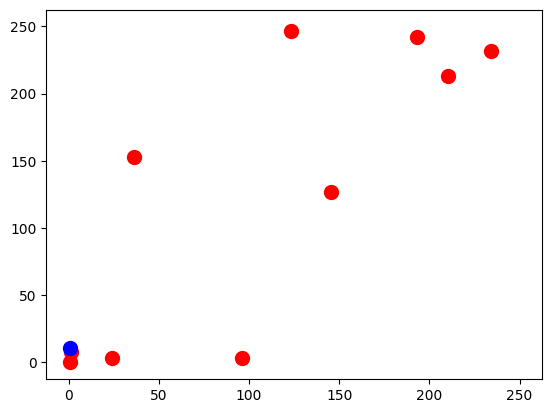

In [86]:

n = len(df_coordinates)

num_predators = 10
num_preys = 1

from celluloid import Camera

camera = Camera(plt.figure())
for i in range(n):
    x = df_coordinates[x_coord].loc[i]
    y = df_coordinates[y_coord].loc[i]
    
    x_pred, y_pred = x[:num_predators], y[:num_predators]
    x_prey, y_prey = x[num_predators:], y[num_predators:]
    
    plt.scatter(x_pred, y_pred, c='red', s=100, marker='o')
    plt.scatter(x_prey, y_prey, c='blue', s=100, marker='o')     
    
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4')